# ON-OFF (average and subtraction? which go first?)

In [3]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

In [4]:
filename = '../org_psr/Sun17_A_00/20211010/Sun17_A_00_arcdrift-M01_0001.fits'

hdulist = fits.open(filename)
hdu0    = hdulist[0]
hdu1    = hdulist[1]

In [5]:
hdu1.header

XTENSION= 'BINTABLE'           / ***** Subintegration data  *****               
BITPIX  =                    8 / N/A                                            
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =             16941132 / width of table in bytes                        
NAXIS2  =                  128 / Number of rows in table (NSUBINT)              
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   17 / Number of fields per row                       
TTYPE1  = 'TSUBINT '           / Length of subintegration                       
TFORM1  = '1D      '           / Double                                         
TTYPE2  = 'OFFS_SUB'           / Offset from Start of subint centre             
TFORM2  = '1D      '           / Double                                         
TTYPE3  = 'LST_SUB '        

In [6]:
hdu1.data['data']

array([[[[[ 42],
          [  0],
          [  1],
          ...,
          [  7],
          [ 10],
          [  5]],

         [[  7],
          [  2],
          [  1],
          ...,
          [ 11],
          [  7],
          [  7]],

         [[145],
          [127],
          [127],
          ...,
          [125],
          [126],
          [126]],

         [[128],
          [128],
          [128],
          ...,
          [127],
          [124],
          [129]]],


        [[[ 23],
          [  1],
          [  1],
          ...,
          [  9],
          [  9],
          [  6]],

         [[ 10],
          [  2],
          [  1],
          ...,
          [ 12],
          [ 10],
          [  7]],

         [[143],
          [128],
          [128],
          ...,
          [128],
          [129],
          [128]],

         [[128],
          [127],
          [128],
          ...,
          [124],
          [128],
          [129]]],


        [[[164],
          [  0],
          

In [7]:
hdu1.data['data'].shape

(128, 1024, 4, 4096, 1)

In [8]:
data = np.array(hdu1.data['data'],dtype=np.float32)

In [9]:
samp0 = hdu1.data['data'][0,0,:,:,0] # subint 0, sample 0
                                # all data are recorded in type(uint8)

In [10]:
samp1 = hdu1.data['data'][0,1,:,:,0] # subint 0, sample 1

In [11]:
samp0

array([[ 42,   0,   1, ...,   7,  10,   5],
       [  7,   2,   1, ...,  11,   7,   7],
       [145, 127, 127, ..., 125, 126, 126],
       [128, 128, 128, ..., 127, 124, 129]], dtype=uint8)

(0.0, 50.0)

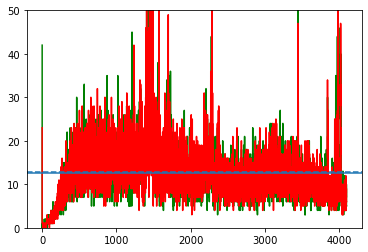

In [12]:
#plt.plot(np.arange(4096),np.array(samp1[0],dtype=float)-np.array(samp0[0],dtype=float))
plt.step(np.arange(4096),samp0[0],color='green')
plt.step(np.arange(4096),samp1[0],color='red')
plt.axhline(y=np.nanmean(samp0[0]),ls='-')
plt.axhline(y=np.nanmean(samp1[0]),ls='--')
#plt.plot(np.arange(4096),np.array(samp1[0],dtype=float)-np.array(samp0[0],dtype=float))
plt.ylim(0,50)

In [13]:
data.shape

(128, 1024, 4, 4096, 1)

In [14]:
test_data = data[:2]

In [15]:
test_data.shape

(2, 1024, 4, 4096, 1)

#### ave before sub

In [16]:
test_data_1 = test_data.reshape(1,-1,2,4,4096)
mean_1 = test_data_1.mean(axis=1,dtype=np.float32)

In [17]:
test_data_1.shape

(1, 1024, 2, 4, 4096)

In [18]:
mean_1.shape

(1, 2, 4, 4096)

In [19]:
on_off_1 = mean_1[0,1,:,:]-mean_1[0,0,:,:]

In [20]:
on_off_1.shape

(4, 4096)

In [21]:
on_off_1

array([[-0.24804688,  0.03222656,  0.05078125, ...,  0.3388672 ,
         0.265625  ,  0.3046875 ],
       [ 1.3554688 ,  0.00878906,  0.03027344, ...,  0.3203125 ,
         0.4892578 ,  0.17089844],
       [-2.6269531 , -0.01660156, -0.00683594, ...,  0.078125  ,
         0.16015625,  0.09375   ],
       [ 0.        ,  0.00976562, -0.01464844, ...,  0.06445312,
        -0.140625  , -0.02441406]], dtype=float32)

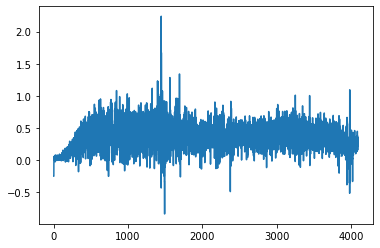

In [22]:
plt.step(np.arange(4096),on_off_1[0],where='mid')

#### sub before ave

In [23]:
on_off_2_arr = test_data_1[0,:,1,:,:]-test_data_1[0,:,0,:,:]

In [24]:
on_off_2_arr

array([[[ -19.,    1.,    0., ...,    2.,   -1.,    1.],
        [   3.,    0.,    0., ...,    1.,    3.,    0.],
        [  -2.,    1.,    1., ...,    3.,    3.,    2.],
        [   0.,   -1.,    0., ...,   -3.,    4.,    0.]],

       [[ -13.,    1.,    0., ...,    2.,   -1.,    1.],
        [ -54.,    0.,    0., ...,   -4.,    1.,   -2.],
        [ -52.,    0.,   -1., ...,   -4.,    0.,    3.],
        [   0.,   -1.,    0., ...,   -2.,    1.,    4.]],

       [[  70.,    0.,   -1., ...,    0.,   -1.,    5.],
        [-224.,    0.,    0., ...,    2.,    5.,    0.],
        [  49.,    0.,    0., ...,    2.,    1.,    0.],
        [   0.,    0.,    1., ...,    0.,    2.,   -1.]],

       ...,

       [[ -84.,   -1.,    0., ...,   -3.,    3.,    6.],
        [-215.,    0.,    0., ...,   -5.,   -1.,    3.],
        [  23.,    0.,    1., ...,    1.,    1.,    2.],
        [   0.,    0.,    0., ...,   -2.,   -4.,    0.]],

       [[  -4.,    1.,   -1., ...,   -6.,    4.,    0.],
        [ 

In [25]:
on_off_2_arr.shape

(1024, 4, 4096)

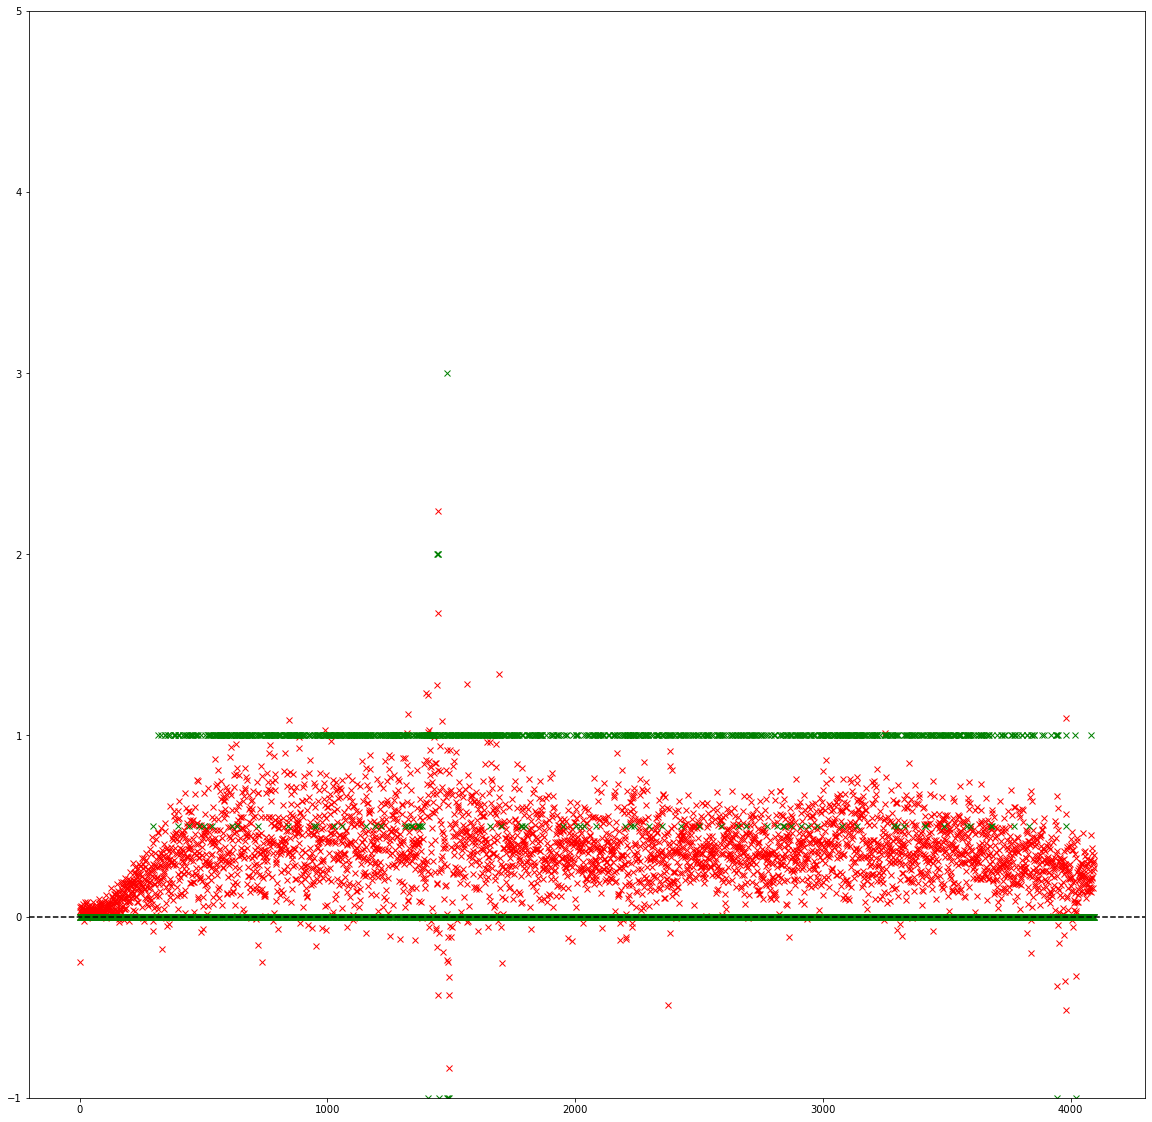

In [26]:
plt.figure(figsize=(20,20))
plt.plot(np.arange(4096),np.mean(on_off_2_arr[:,0,:],axis=0),color='red',marker='x',ls='')
plt.plot(np.arange(4096),np.median(on_off_2_arr[:,0,:],axis=0),color='green',marker='x',ls='')
plt.ylim(-1,5)
plt.axhline(y=0,color='black',ls='--')

(array([166., 214., 251., 305., 334., 393., 349., 276., 239., 375.]),
 array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5]),
 <BarContainer object of 10 artists>)

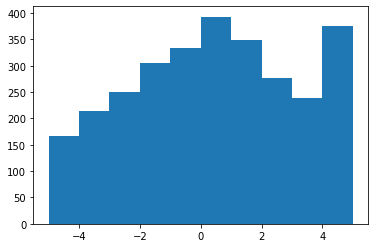

In [27]:
plt.hist(on_off_2_arr[0,0,:],bins=[-5,-4,-3,-2,-1,0,1,2,3,4,5])

In [28]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*.  The return value is a tuple
    (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
    *patches1*, ...]) if the input contains multiple data.  See the
    documentation of the *weights* parameter to draw a histogram of
    already-binned data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported.
    
    The *bins*, *range*, *weights*, and *density* parameters behave as in
    `

In [29]:
on_off_2 = on_off_2_arr.mean(axis=0,dtype=np.float32)

In [30]:
on_off_2

array([[-0.24804688,  0.03222656,  0.05078125, ...,  0.3388672 ,
         0.265625  ,  0.3046875 ],
       [ 1.3554688 ,  0.00878906,  0.03027344, ...,  0.3203125 ,
         0.4892578 ,  0.17089844],
       [-2.6269531 , -0.01660156, -0.00683594, ...,  0.078125  ,
         0.16015625,  0.09375   ],
       [ 0.        ,  0.00976562, -0.01464844, ...,  0.06445312,
        -0.140625  , -0.02441406]], dtype=float32)

In [31]:
on_off_2.shape

(4, 4096)

In [32]:
compare = on_off_2-on_off_1

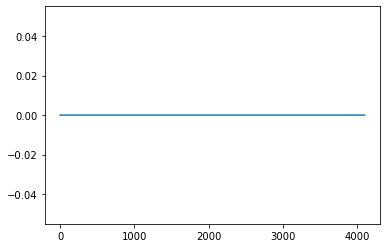

In [33]:
plt.step(np.arange(4096),compare[1],where='mid')

In [34]:
org_data = hdu1.data['data']

In [35]:
        dataauto  = org_data[:,:,:2,:,:]
        datacross = org_data[:,:,2:,:,:].astype(np.int8)

In [36]:
        auto  = dataauto.reshape(64,-1,2,2,4096).mean(axis=1, dtype=np.float32)
        cross = datacross.reshape(64,-1,2,2,4096).mean(axis=1, dtype=np.float32)
        
        data_m1 = np.concatenate((auto,cross),axis=2)
    

In [37]:
data_m1.shape

(64, 2, 4, 4096)

In [38]:
org_data.shape

(128, 1024, 4, 4096, 1)

In [30]:
        data_m2  = org_data.reshape(64,-1,2,4,4096).mean(axis=1, dtype=np.float32)


In [31]:
data_m2-data_m1

array([[[[  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
         [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
         [161.5 , 128.  , 127.  , ..., 128.5 , 130.5 , 127.  ],
         [256.  , 119.75, 120.5 , ..., 125.5 , 131.75, 128.5 ]],

        [[  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
         [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
         [156.  , 123.75, 125.25, ..., 137.25, 141.5 , 129.75],
         [256.  , 123.  , 117.  , ..., 130.75, 116.5 , 128.5 ]]],


       [[[  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
         [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
         [173.75, 119.5 , 125.5 , ..., 135.  , 130.75, 133.5 ],
         [256.  , 121.75, 119.75, ..., 128.25, 131.  , 131.75]],

        [[  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
         [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
         [174.75, 122.5 , 123.5 , ..., 139.75, 140.5 , 132.5 ],
         [256.  , 116.75, 119.25

# Tsys of the PSR backend

In [32]:
callist = '../Sun17_A_00/M01/mycallist_Sun17_A_00_M01'

In [33]:
callist = np.loadtxt(callist,dtype=str)
callist

array(['/bb8/lingrui/my_projects/FAST_pipeline/Sun17_A_00/M01/HighCAL/Sun17_A_00_arcdrift-M01_0001_211010_100500_cal.fits',
       '/bb8/lingrui/my_projects/FAST_pipeline/Sun17_A_00/M01/HighCAL/Sun17_A_00_arcdrift-M01_0002_211010_100512_cal.fits',
       '/bb8/lingrui/my_projects/FAST_pipeline/Sun17_A_00/M01/HighCAL/Sun17_A_00_arcdrift-M01_0003_211010_100525_cal.fits',
       '/bb8/lingrui/my_projects/FAST_pipeline/Sun17_A_00/M01/HighCAL/Sun17_A_00_arcdrift-M01_0004_211010_100538_cal.fits',
       '/bb8/lingrui/my_projects/FAST_pipeline/Sun17_A_00/M01/HighCAL/Sun17_A_00_arcdrift-M01_0005_211010_100551_cal.fits',
       '/bb8/lingrui/my_projects/FAST_pipeline/Sun17_A_00/M01/HighCAL/Sun17_A_00_arcdrift-M01_0006_211010_100604_cal.fits',
       '/bb8/lingrui/my_projects/FAST_pipeline/Sun17_A_00/M01/HighCAL/Sun17_A_00_arcdrift-M01_0007_211010_100617_cal.fits',
       '/bb8/lingrui/my_projects/FAST_pipeline/Sun17_A_00/M01/HighCAL/Sun17_A_00_arcdrift-M01_0008_211010_100630_cal.fits',
       '

In [34]:

import numpy as np
import sys
from read_crafts_cal import read_crafts_cal
from read_crafts_spec import read_crafts_spec
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.time import Time as ATime
from scipy.interpolate import interp1d
from scipy import ndimage


In [35]:
    
    cal_mjd = []
    cal_on  = []
    cal_off = []
    
    for calfile in callist:
        try:
            hdu0,hdu1,hdu2 = read_crafts_cal(calfile)
            cal_mjd.append(hdu2.data['mjd'])
            cal_on.append(hdu2.data['cal'][:,1,:,:])
            cal_off.append(hdu2.data['cal'][:,0,:,:])
        except:
            print('WARNING: BAD FITS FILE!! Please check '+ calfile)
    

In [36]:
    cal_mjd = np.concatenate(cal_mjd,axis=0)
    cal_on  = np.concatenate(cal_on,axis=0)
    cal_off = np.concatenate(cal_off,axis=0)
    onoff   = (cal_on-cal_off)/20480*(20480+28672)/2
    nsubint = len(cal_mjd)

In [37]:
    obsfreq  = hdu0.header['OBSFREQ']                # observing frequency
    obsnchan = hdu0.header['OBSNCHAN']               # observing channel number
    obsbw    = hdu0.header['OBSBW']                  # observing band width
    fmin     = float(obsfreq - obsbw/2.)             # minimum frequency
    fmax     = float(obsfreq + obsbw/2.)             # maximum frequency
    nf       = obsnchan                              # channel number
    df       = hdu1.header['CHAN_BW']                # channel width
    cal_freq = np.arange(fmin,fmax,df)/1e3           # frequency array; MHz to GHz
    p        = onoff.shape[1]                        # n_polarization


In [38]:
Tcalfits='Tcal/20201014/CAL.20201014.low.W.fits'
_,noisehdu1 = read_crafts_spec(Tcalfits)
noise_data  = np.transpose(noisehdu1.data['tcal'][0,0,:,:],axes=(1,0))
print('There are {} polarizations in the Tcal noise.'.format(noise_data.shape[0]))
if noise_data.shape[0]<p: 
# add NaN array when the length of the polarization axis of the noise data is smaller than 4.
    noise_data = np.concatenate((noise_data,np.nan*np.ones(shape=(p-noise_data.shape[0],noise_data.shape[1]))),axis=0)
noise_freq  = noisehdu1.data['freq'][0]/1e3 # MHz to GHz


There are 2 polarizations in the Tcal noise.


In [39]:
noisehdu1.data['tcal'].shape

(1, 19, 65536, 2)

In [40]:
noisehdu1.data['freq'].shape

(1, 65536)

In [41]:
noise_data.shape

(4, 65536)

In [42]:
onoff.shape

(4118, 4, 4096)